In [1]:
import pandas as pd 
import numpy as np 
import lightgbm as lgb
from lightgbm.sklearn import LGBMRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from Dataloader import Dataloader
from RamdomForest import RamdomForest
from score import score
from sklearn.utils import shuffle
from IPython.display import display, HTML
from datetime import date
%matplotlib inline

In [2]:
df = pd.read_csv('data/train.csv')
df['avg_price'] = df['total_price']/df['building_area']
df = df.fillna(0)

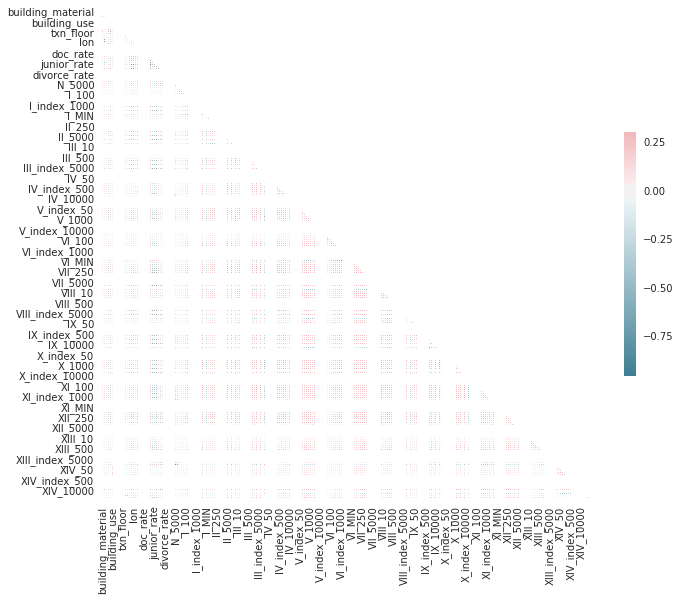

In [3]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

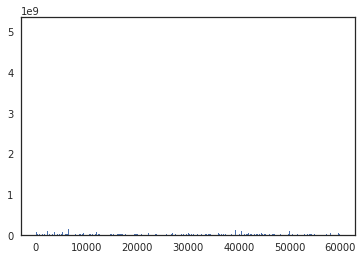

In [5]:
plt.bar(np.arange(len(df['total_price'].values)),df['total_price'].values)
plt.show()